# David Warner performance analysis

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Subramanyaswami T R/Downloads/udemy/Data Analytics Real World Project -Python/4-IPL data Analysis/deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
filt = df['batsman'] == 'DA Warner'
Warner_df = df[filt]

In [5]:
Warner_df.shape

(2902, 21)

In [6]:
Warner_df['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

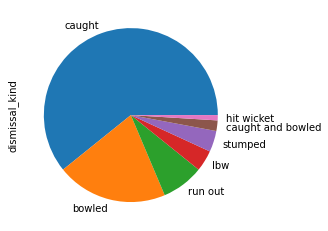

In [7]:
Warner_df['dismissal_kind'].value_counts().plot.pie()

In [8]:
len(Warner_df[Warner_df['batsman_runs'] == 4])

401

In [9]:
len(Warner_df[Warner_df['batsman_runs'] == 6])

160

In [10]:
def count(df,runs):
    return len(Warner_df[Warner_df['batsman_runs']==runs]) * runs

In [11]:
count(Warner_df,1)

997

In [12]:
count(Warner_df,2)

414

In [13]:
count(Warner_df,3)

39

In [14]:
count(Warner_df,4)

1604

In [15]:
count(Warner_df,6)

960

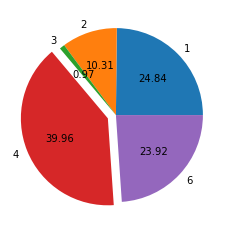

In [16]:
slices = [997,414,39,1604,960]
labels = [1,2,3,4,6]
explode = [0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%.2f',explode=explode)
plt.show()

# Batting performance analysis

In [17]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [18]:
Teams = {'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RP', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'   
}

In [19]:
df['batting_team'] = df['batting_team'].map(Teams)
df['bowling_team'] = df['bowling_team'].map(Teams)

In [20]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [22]:
runs = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

In [23]:
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RP,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


In [24]:
runs.drop('match_id',axis = 1,inplace = True)

In [25]:
runs.head()

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RP,187
4,1,GL,183


In [26]:
inning1 = runs[runs['inning'] == 1]
inning2 = runs[runs['inning'] == 2]

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

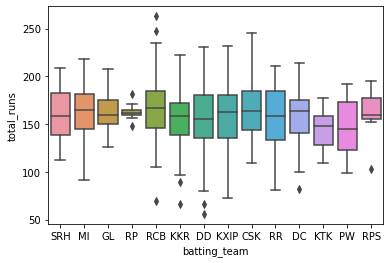

In [28]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

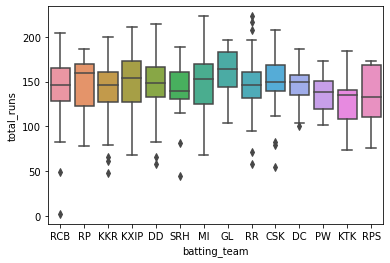

In [29]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

In [30]:
#How many times teams scored more than 200?
high_scores = df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [31]:
score_200 = high_scores[high_scores['total_runs'] >= 200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RP,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


C:\Users\Subramanyaswami T R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

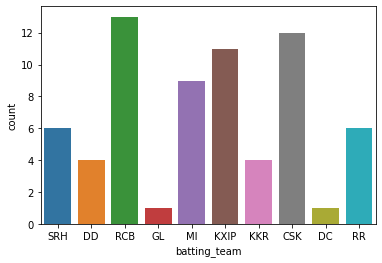

In [32]:
sns.countplot(score_200['batting_team'])

C:\Users\Subramanyaswami T R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

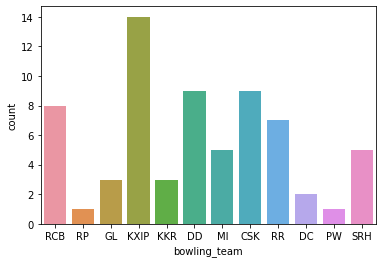

In [33]:
sns.countplot(score_200['bowling_team'])

# Batting and Bowling brilliance

In [34]:
balls = df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [35]:
runs = df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [36]:
four = df[df['batsman_runs'] == 4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [37]:
runs_4 = four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns = ['batsman','4s']

In [38]:
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [39]:
six = df[df['batsman_runs'] == 6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [40]:
runs_6 = six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns = ['batsman','6s']

In [41]:
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [45]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis = 1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,NaN
457,Yashpal Singh,47,67,NaN,NaN
458,Younis Khan,3,7,NaN,NaN
459,Yuvraj Singh,2591,2050,NaN,NaN


In [46]:
player.fillna(0,inplace = True)

In [47]:
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0
457,Yashpal Singh,47,67,0.0,0.0
458,Younis Khan,3,7,0.0,0.0
459,Yuvraj Singh,2591,2050,0.0,0.0


In [48]:
player['strike_rate'] = (player['batsman_runs']/player['ball']) * 100
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033
457,Yashpal Singh,47,67,0.0,0.0,70.149254
458,Younis Khan,3,7,0.0,0.0,42.857143
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244


In [49]:
grp = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()

In [50]:
maxx = grp.groupby('batsman')['batsman_runs'].max().reset_index()
maxx.columns = ['batsman','max_runs']

In [51]:
maxx

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


<AxesSubplot:xlabel='batsman'>

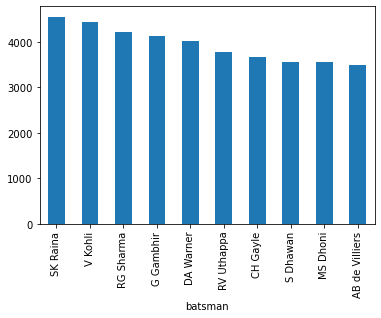

In [52]:
#Top 10 batsmen with highest runs
max_runs = df.groupby('batsman')['batsman_runs'].sum()
max_runs.sort_values(ascending = False)[0:10].plot(kind = 'bar')

In [53]:
#Highest individual scores
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by = 'batsman_runs',ascending = False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [54]:
#Highest wicket takers
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [55]:
dismissal_kinds = ['caught','bowled','lbw','caught and bowled','stumped','hit wicket']

In [56]:
hwt = df[df['dismissal_kind'].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


<AxesSubplot:>

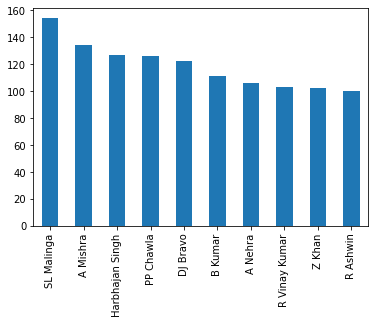

In [58]:
hwt['bowler'].value_counts()[:10].plot.bar()

# Basic Analysis on IPL

In [1]:
#import necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/Subramanyaswami T R/Downloads/udemy/Data Analytics Real World Project -Python/4-IPL data Analysis/matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [4]:
df.shape

(636, 18)

In [6]:
df.drop(['umpire3'],axis = 1, inplace = True)

In [7]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [8]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
Teams =  {'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RP', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'   
}

In [11]:
df['team1'] = df['team1'].map(Teams)
df['team2'] = df['team2'].map(Teams)

In [12]:
#Total matches played
df.shape[0]

636

In [13]:
#Cities
len(df['city'].unique())

31

In [15]:
#Most player of the match awards
df['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64

In [16]:
#Win by highest margin of runs
filterr = df['win_by_runs'].max()
df[df['win_by_runs'] == filterr]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [18]:
#Win by highest margin of wickets
filterr = df['win_by_wickets'].max()
df[df['win_by_wickets'] == filterr]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


# Performance analysis across seasons


<AxesSubplot:xlabel='season', ylabel='count'>

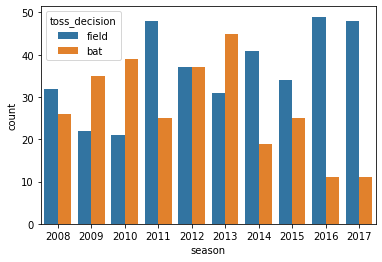

In [19]:
#Toss decisions across seasons
sns.countplot(x='season',hue='toss_decision',data=df)

<AxesSubplot:>

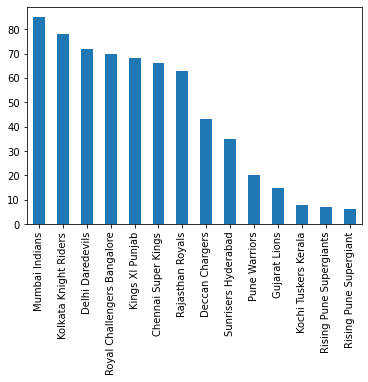

In [20]:
#Toss won most times
df['toss_winner'].value_counts().plot.bar()

In [21]:
#Matches vs Wins
teams = (df['team1'].value_counts() + df['team2'].value_counts()).reset_index()

In [22]:
teams.columns = ['team_name','Matches Played']
teams

,team_name,Matches Played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [23]:
df['winner'] = df['winner'].map(Teams)

In [26]:
wins = df['winner'].value_counts().reset_index()


In [27]:
wins.columns = ['team_name','wins']
wins

,team_name,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,GL,13


In [31]:
teamw = teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')

In [32]:
teamw

,team_name,Matches Played,wins
0,CSK,131,79
1,DC,75,29
2,DD,147,62
3,GL,30,13
4,KKR,148,77
5,KTK,14,6
6,KXIP,148,70
7,MI,157,92
8,PW,46,12
9,RCB,152,73


In [33]:
teamw['win%'] = (teamw['wins']/teamw['Matches Played']) * 100
teamw

,team_name,Matches Played,wins,win%
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KTK,14,6,42.857143
6,KXIP,148,70,47.297297
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316


In [34]:
#Visualizing the results
import plotly.offline as py
import plotly.graph_objs as go

In [40]:
trace1 = go.Bar(x=teamw['team_name'],y=teamw['Matches Played'],name='Total Matches')
trace2 = go.Bar(x=teamw['team_name'],y=teamw['wins'],name='Matches Won')

In [41]:
data = [trace1,trace2]
py.iplot(data)

C:\Users\Subramanyaswami T R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='season', ylabel='count'>

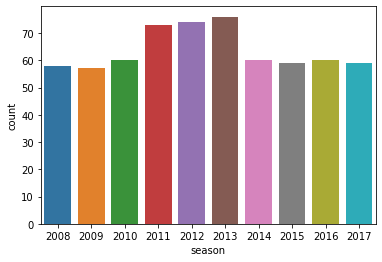

In [42]:
#Matches played across each season
sns.countplot(df['season'])

# Comparitive Analysis of Teams

In [43]:
#Runs across seasons
df2 = pd.read_csv("C:/Users/Subramanyaswami T R/Downloads/udemy/Data Analytics Real World Project -Python/4-IPL data Analysis/deliveries.csv")
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [101]:
season = df[['id','season']].merge(df2,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
season

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [102]:
season = season.groupby('season')['total_runs'].sum().reset_index()
season.set_index('season',inplace = True)

<AxesSubplot:xlabel='season'>

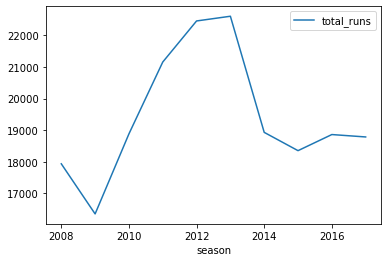

In [103]:
season.plot()

In [104]:
#Average runs per match in each season
avg_runs = df.groupby('season')['id'].count().reset_index().rename(columns={'id':'Matches'})
avg_runs

,season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [106]:
season.reset_index(inplace = True)

In [107]:
season = pd.concat([avg_runs,season.iloc[:,1]],axis=1)


In [108]:
season['runs_per_match'] = season['total_runs'] / season['Matches']

<AxesSubplot:xlabel='season'>

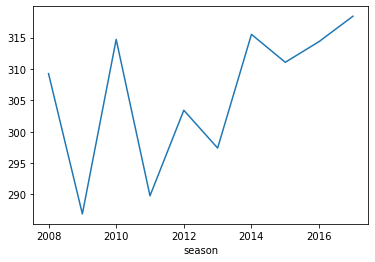

In [109]:
season.set_index('season')['runs_per_match'].plot()

In [110]:
#3 Lucky grounds for teams
def luckyg(df,team_name):
    return df[df['winner'] == team_name]['venue'].value_counts().nlargest(5)

In [111]:
luckyg(df,'CSK')

MA Chidambaram Stadium, Chepauk    33
Feroz Shah Kotla                    5
M Chinnaswamy Stadium               4
Eden Gardens                        4
Wankhede Stadium                    4
Name: venue, dtype: int64

<AxesSubplot:>

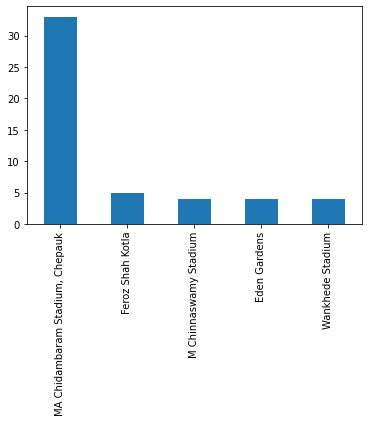

In [112]:
luckyg(df,'CSK').plot.bar()

In [113]:
#Comparision between two teams
def comparision(team1,team2):
    compare = df[((df['team1'] == team1)|(df['team2']==team1))  & ((df['team1'] == team2)|(df['team2'] == team2))]
    sns.countplot(x='season',hue='winner',data=compare)

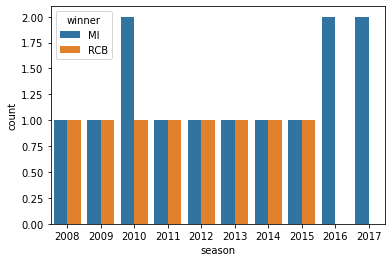

In [114]:
comparision('MI','RCB')

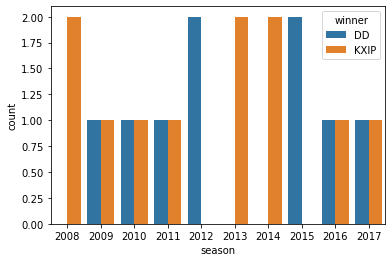

In [116]:
comparision('KXIP','DD')